Student Performance Indication

Machine learning lifecycle:

1. Understanding: Problem and Goal
2. Data Collection
3. Data checks
4. EDA
5. Pre-processing
6. Training
7. Model Selection (validation, evaluation)


1. 
The Problem: How are students exam results affected by external variables
The Goal: Predict how well a student will perform in their exam

2. 
Data Collection:
Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download


In [1]:
# Import Libraries and Load Data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('data/Stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
shape = df.shape
print(f"Data shape: {shape}")

Data shape: (1000, 8)


About the Data:

- gender (m/f)
- race/ethnicity (Group: A-E)
- Parental Education level: School - Degree
- Lunch prior to exam: Free/Reduced/Standard
- Math result
- Reading score
- Writing score 

3. Data Checks

- Missing 
- Duplicates
- Data type
- No. of Unique values
- Stats
- Cats in categorical columns


In [4]:
df.isnull().sum()
# Check for missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()
# Check for duplicates

np.int64(0)

In [6]:
df.info()
# Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()
# Check unique values in each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.describe().T
# Get descriptive statistics

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Insight:
- Tight mean range (66-68.05)
- Tight SD (14.6-15.19)
- Math min = 0
- Writing min = 10
- Reading min = 17

Data Exploration

In [9]:
df['gender'].unique()
df['race/ethnicity'].unique()
df['parental level of education'].unique()
df['lunch'].unique()
df['test preparation course'].unique()

# Check unique values in categorical columns

array(['none', 'completed'], dtype=object)

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['math score', 'reading score', 'writing score']
Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Add columns for Total and AVG scores

In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Students have performed better in reading, with maths being the subject with the poorest performance.

EDA Visualisation

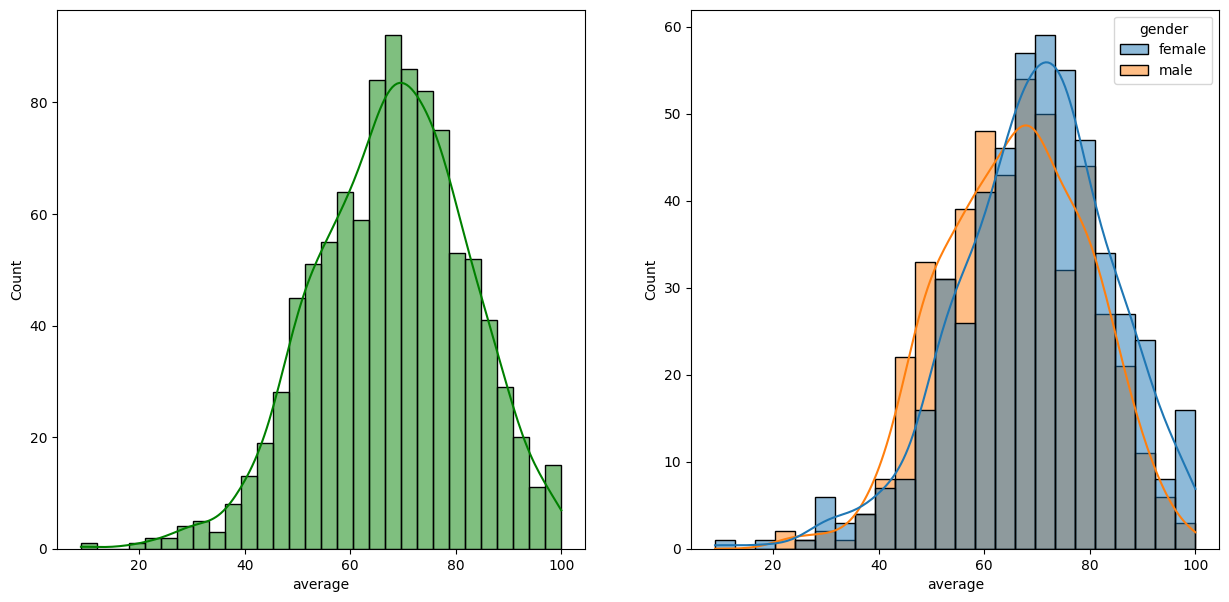

In [15]:
# Visualise the distribution of test scores
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()


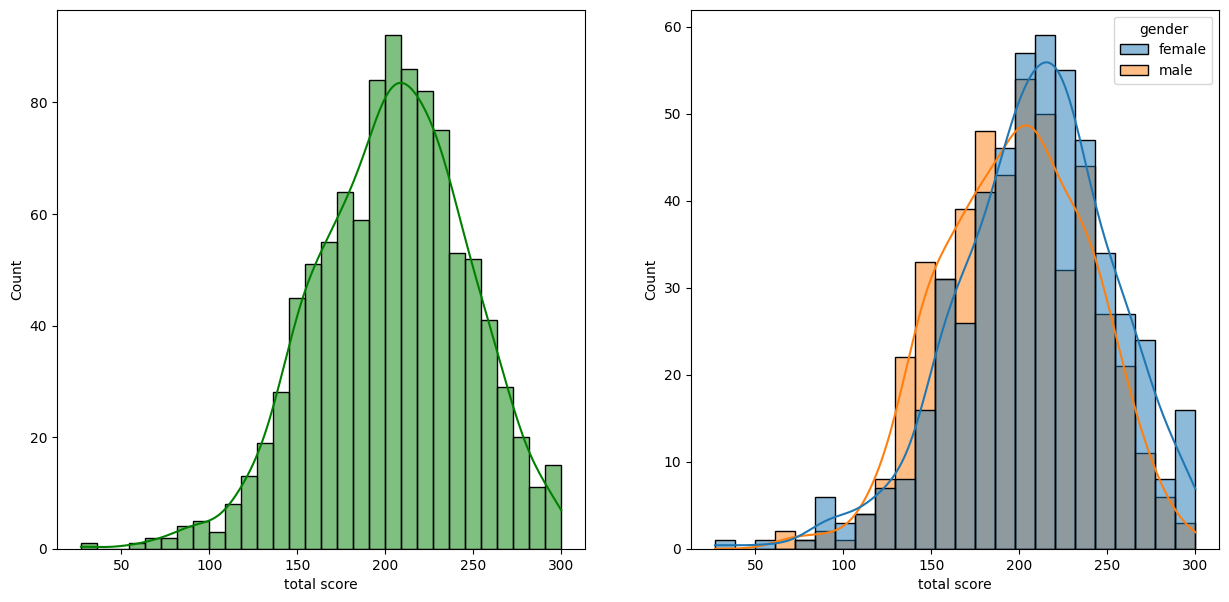

In [16]:
# Visualise the distribution of test scores
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()


Insight:
Females perform, as a whole, better than males

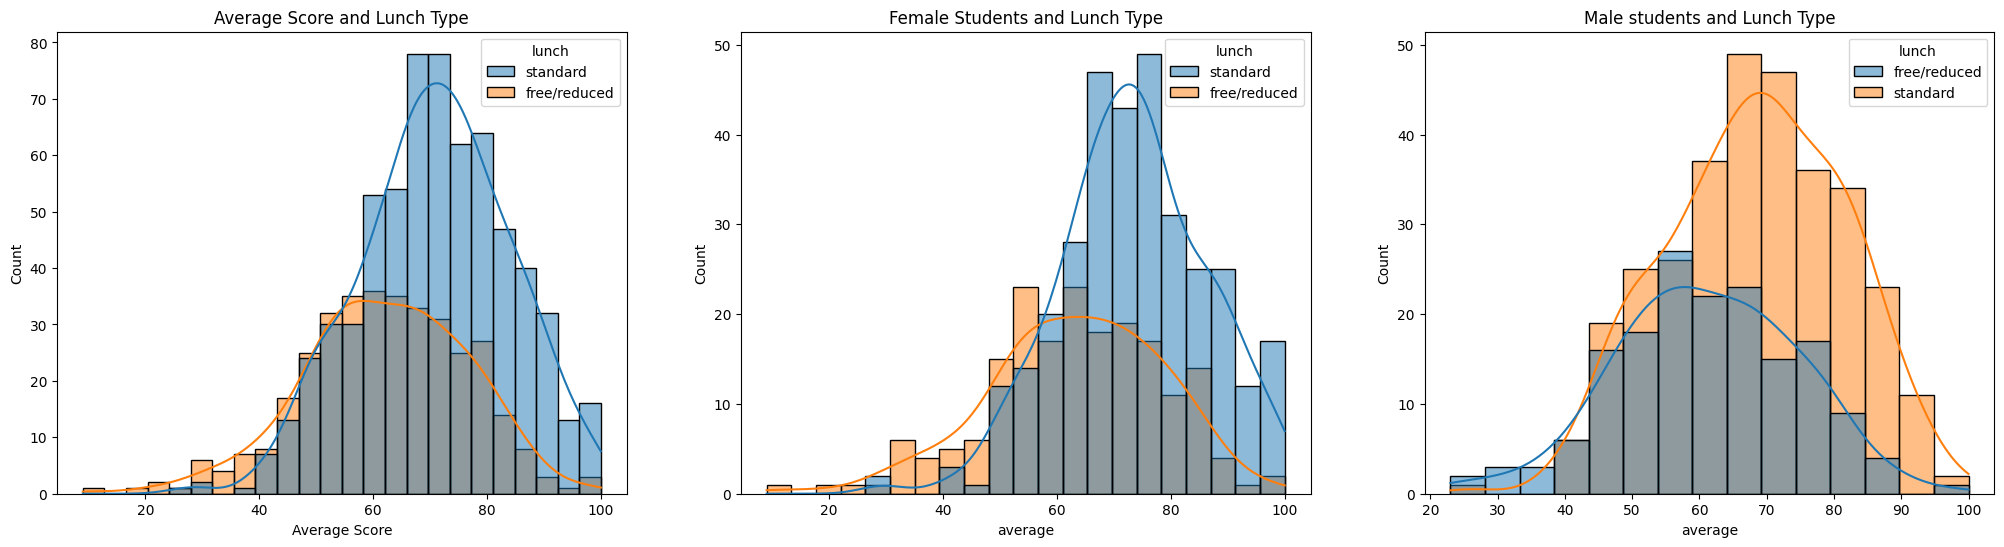

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.xlabel("Average Score")
plt.title("Average Score and Lunch Type")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title("Female Students and Lunch Type")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title("Male students and Lunch Type")
plt.show()

Lunch:
- Suggests lunch assists in the students performance for both m and f.

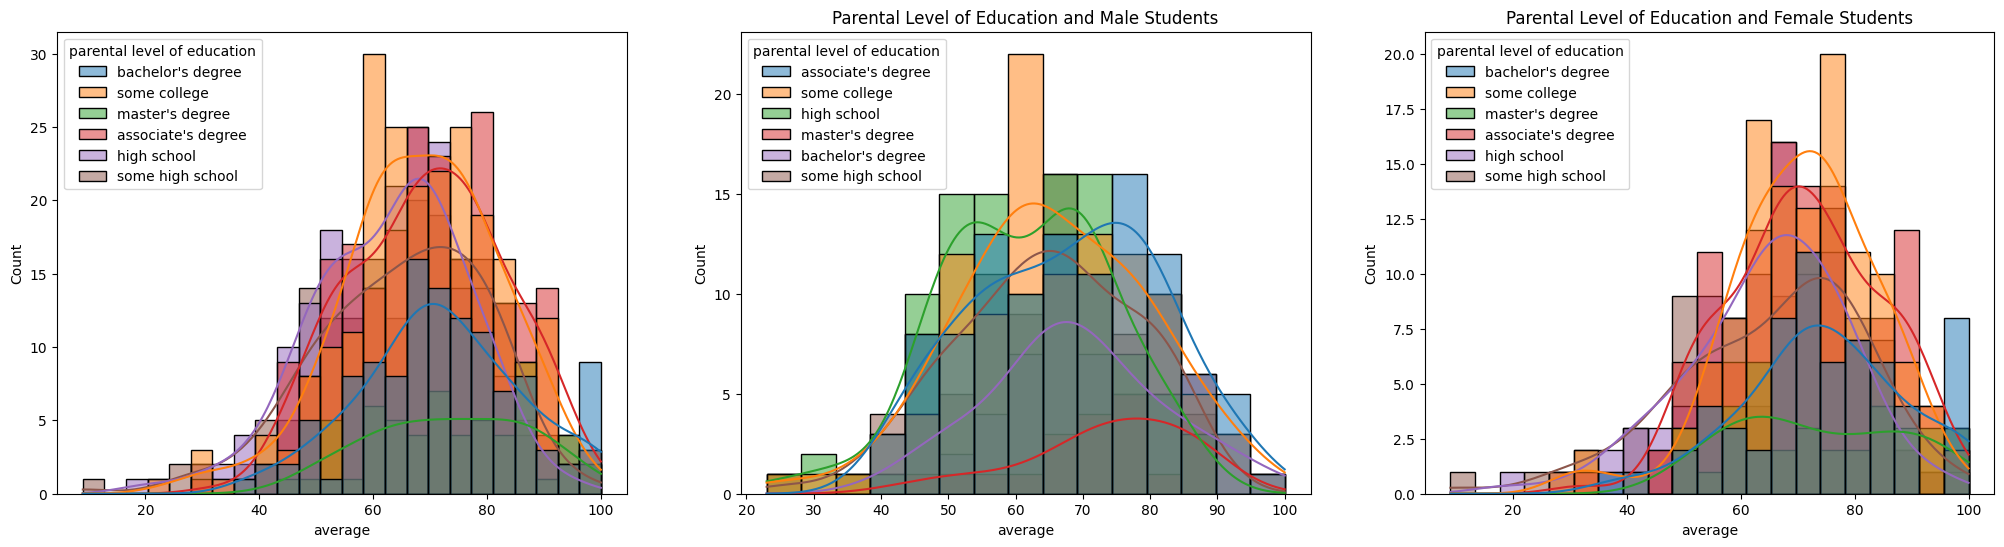

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.title("Parental Level of Education and Male Students")
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.title("Parental Level of Education and Female Students")
plt.show()

Insight:
- Parental education does not have much of an impact on their childrens exam performance.

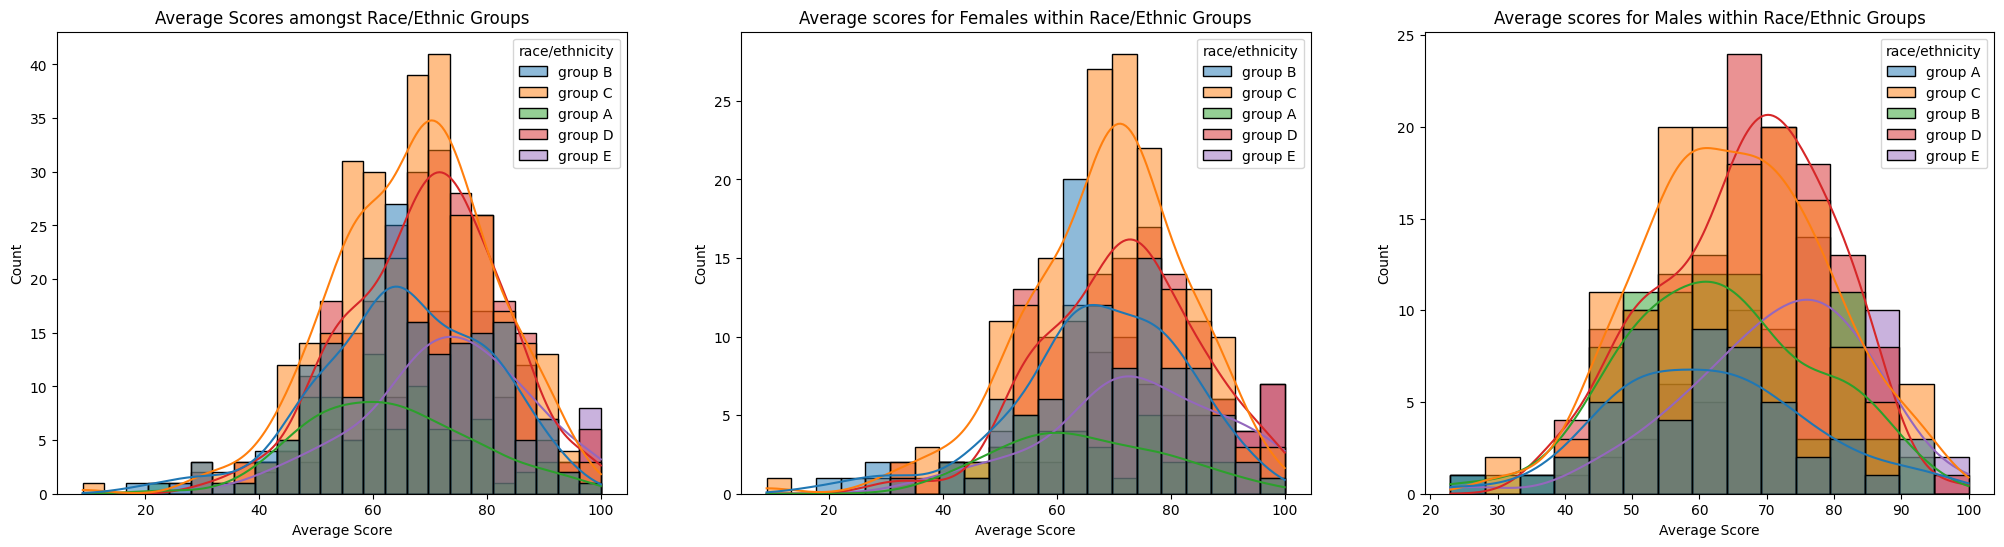

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.xlabel("Average Score")
plt.title("Average Scores amongst Race/Ethnic Groups")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.title("Average scores for Females within Race/Ethnic Groups")
plt.xlabel("Average Score")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.title("Average scores for Males within Race/Ethnic Groups")
plt.xlabel("Average Score")
plt.show()

Groups A and B tend to have a lower performance, with gender not having an impact.

Max Scores:

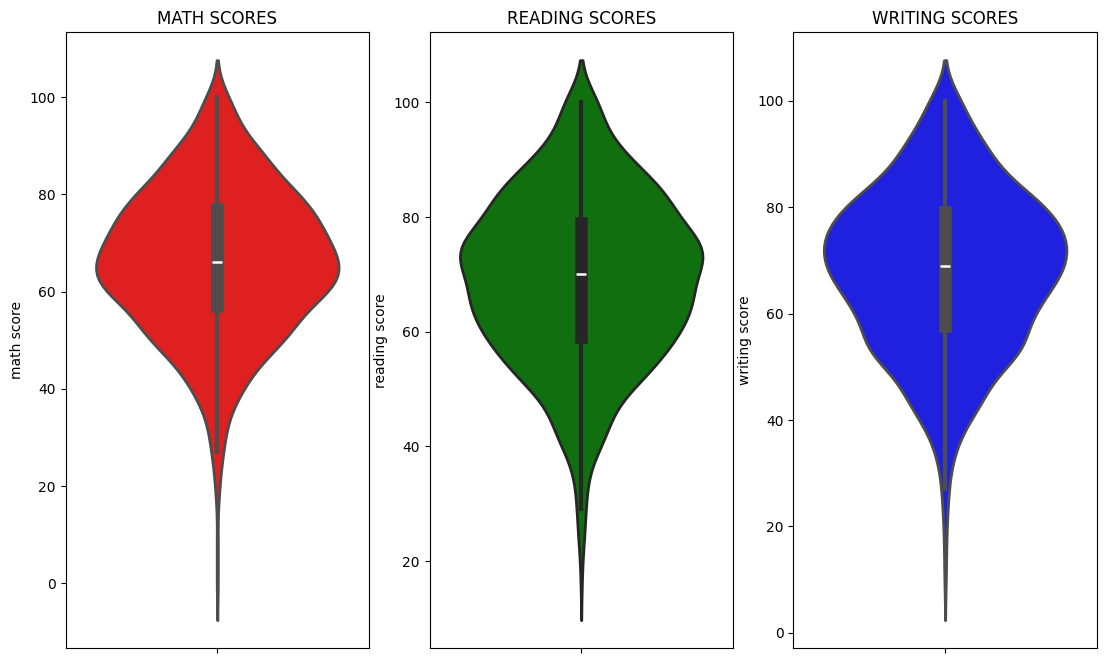

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=2)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=2)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=2)
plt.show()

Insight:
Most students score between 60-80 in maths, and 50-80 for reading and writing

Multivariate Analysis

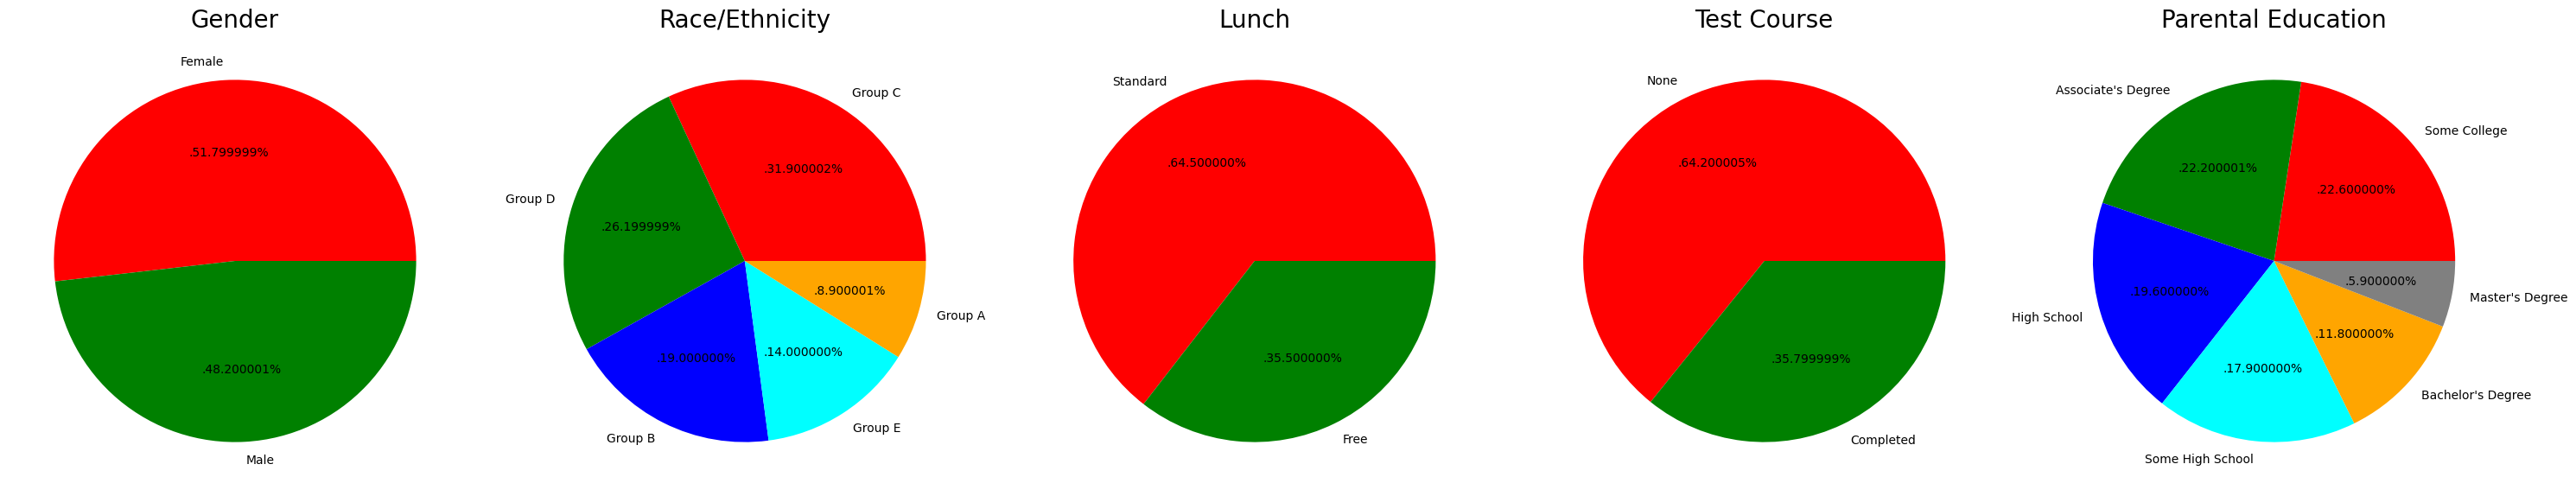

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insight:
- Almost equal number of males and females
- Largest ethnic/race group is C, with A having the least.
- Approx 2/3 of students have a Standard lunch
- Approx 2/3 of students did not take an exam prep course
- 

Univariate Analysis: Gender

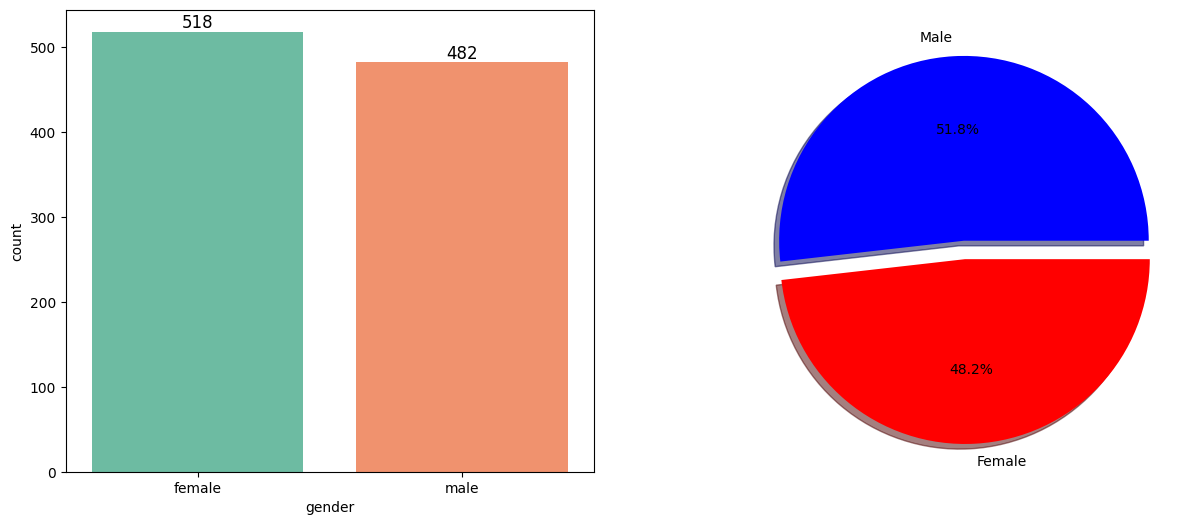

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='gender', data=df, palette='Set2', ax=axs[0], saturation=0.85)
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', size=12, color='black')

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['b','r'])
plt.show()

Male: Female ratio is almost equal

Bivariate analysis

In [23]:
# Select only numeric columns before applying groupby and mean
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


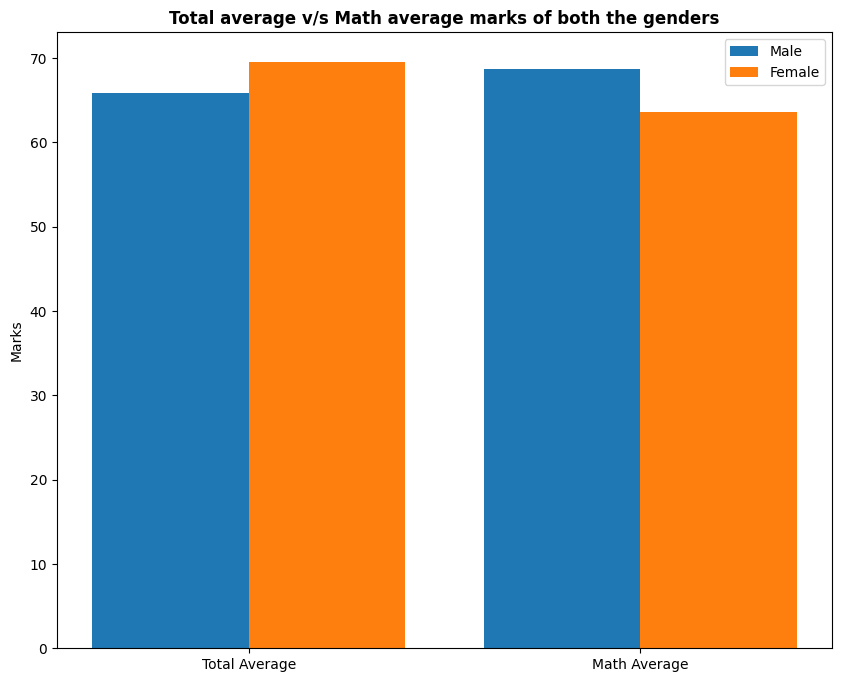

In [24]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average']['female'], gender_group['math score']['female']]
male_scores = [gender_group['average']['male'], gender_group['math score']['male']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


Insight:
Females performed on the whole, on average, better than males, except for in maths.

Race Ethnicity: Univariate Analysis

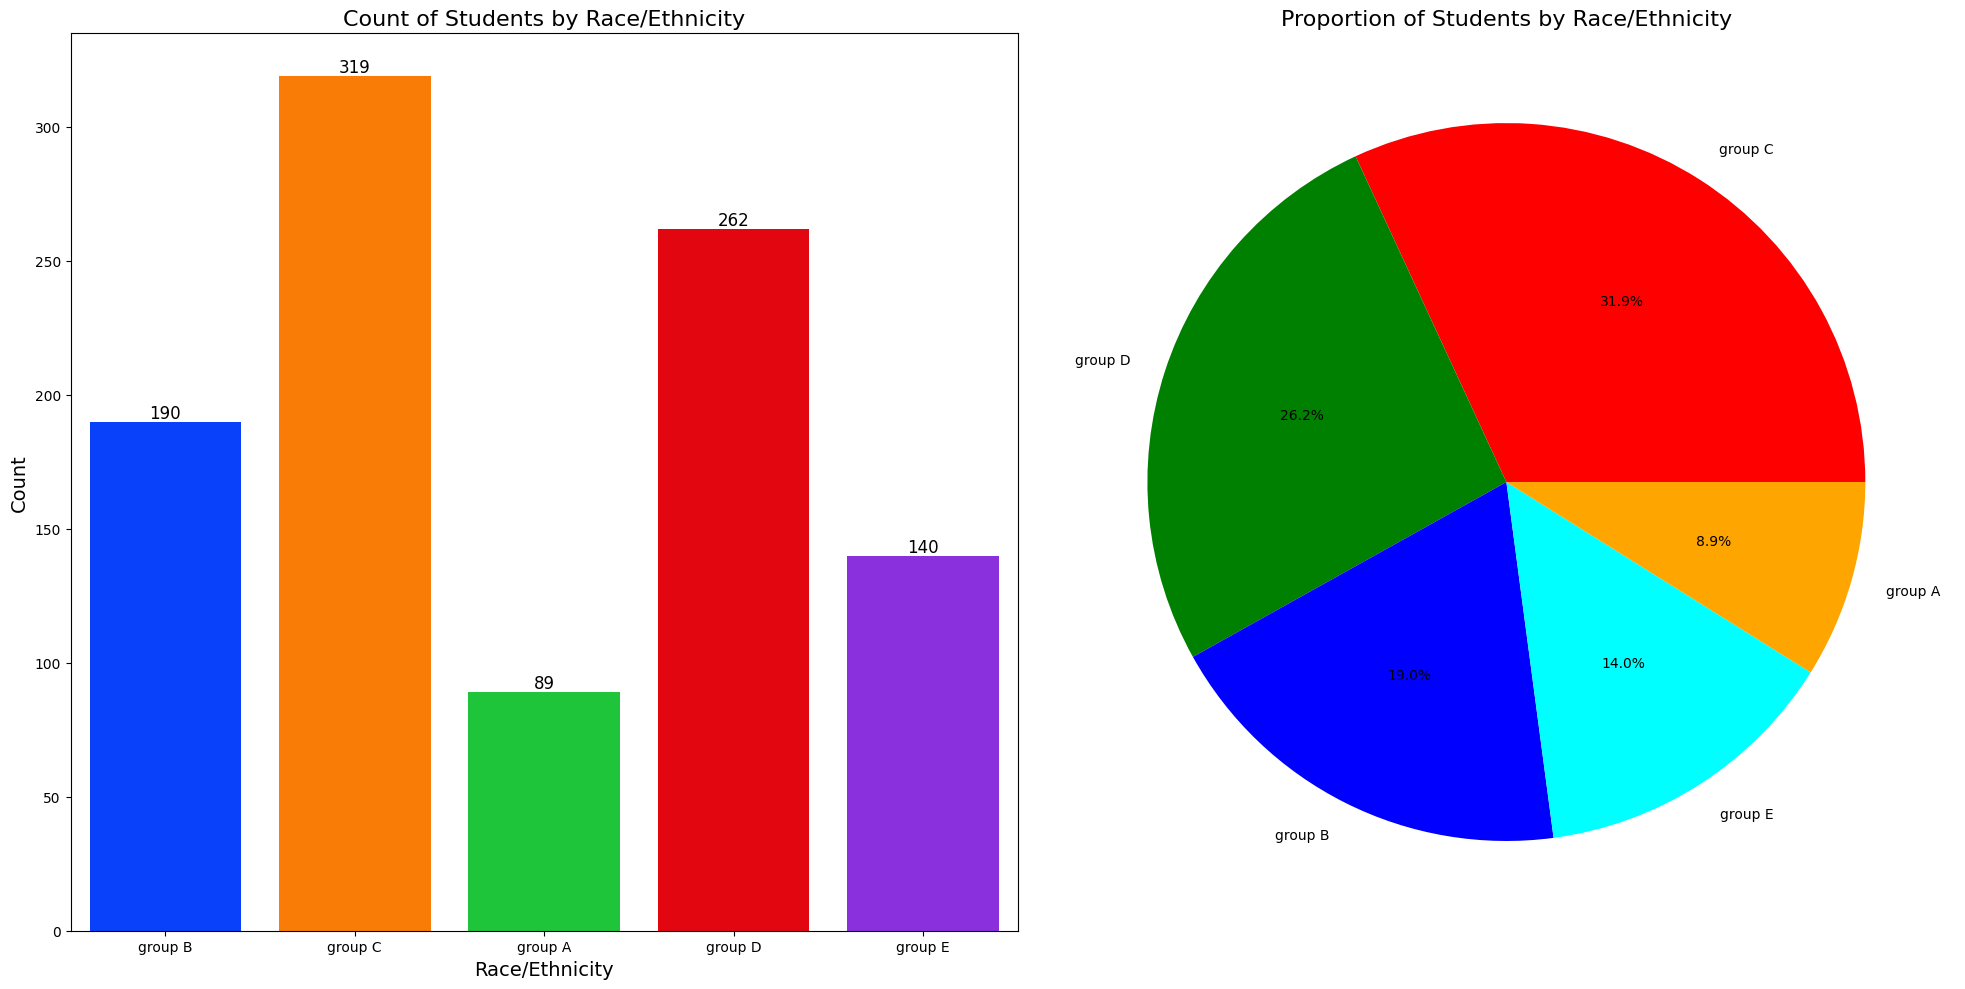

In [27]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Countplot for race/ethnicity
sns.countplot(
    x='race/ethnicity', 
    data=df, 
    palette='bright', 
    ax=axs[0], 
    saturation=0.95
)
axs[0].set_title("Count of Students by Race/Ethnicity", fontsize=16)
axs[0].set_xlabel("Race/Ethnicity", fontsize=14)
axs[0].set_ylabel("Count", fontsize=14)
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=12)

# Pie chart for race/ethnicity
axs[1].pie(
    x=df['race/ethnicity'].value_counts(),
    labels=df['race/ethnicity'].value_counts().index,
    explode=[0.0, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=False,
    colors=['red', 'green', 'blue', 'cyan', 'orange']
)
axs[1].set_title("Proportion of Students by Race/Ethnicity", fontsize=16)

# Adjust layout and display
plt.tight_layout()
plt.show()

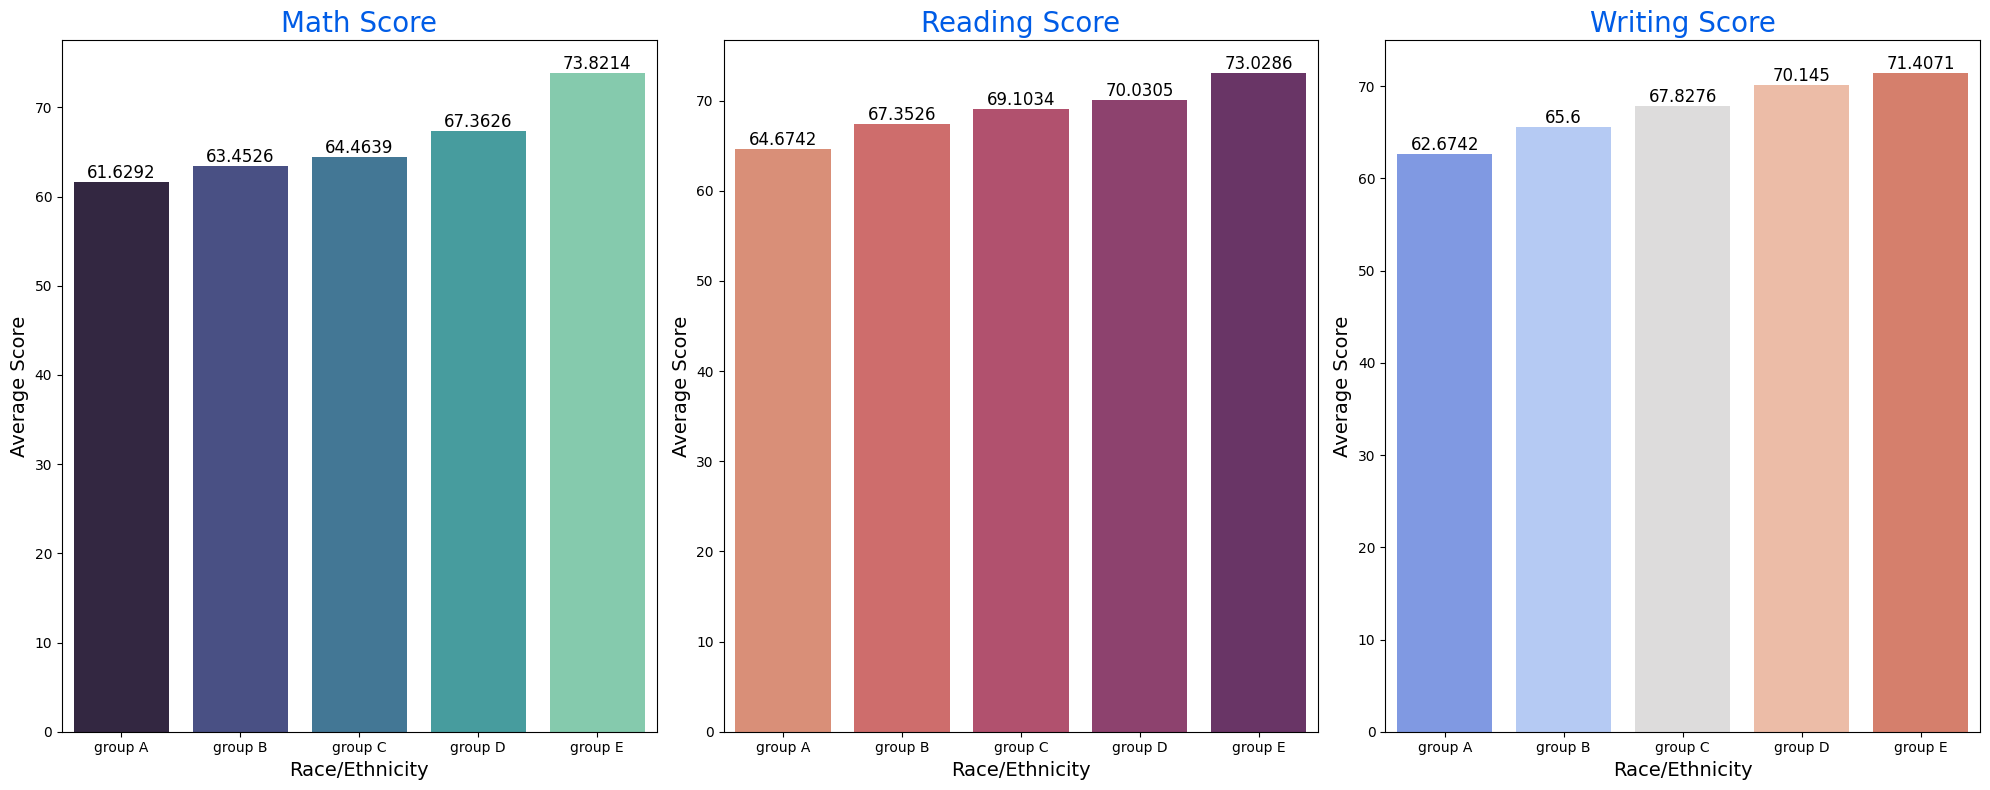

In [28]:
# Group data by 'race/ethnicity'
group_data = df.groupby('race/ethnicity')

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Math Scores
sns.barplot(
    x=group_data['math score'].mean().index,
    y=group_data['math score'].mean().values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].set_ylabel('Average Score', fontsize=14)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# Plot Reading Scores
sns.barplot(
    x=group_data['reading score'].mean().index,
    y=group_data['reading score'].mean().values,
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_xlabel('Race/Ethnicity', fontsize=14)
ax[1].set_ylabel('Average Score', fontsize=14)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

# Plot Writing Scores
sns.barplot(
    x=group_data['writing score'].mean().index,
    y=group_data['writing score'].mean().values,
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_xlabel('Race/Ethnicity', fontsize=14)
ax[2].set_ylabel('Average Score', fontsize=14)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Insight:
- Group E score highest
- Group A have the lowest


Parental level of education

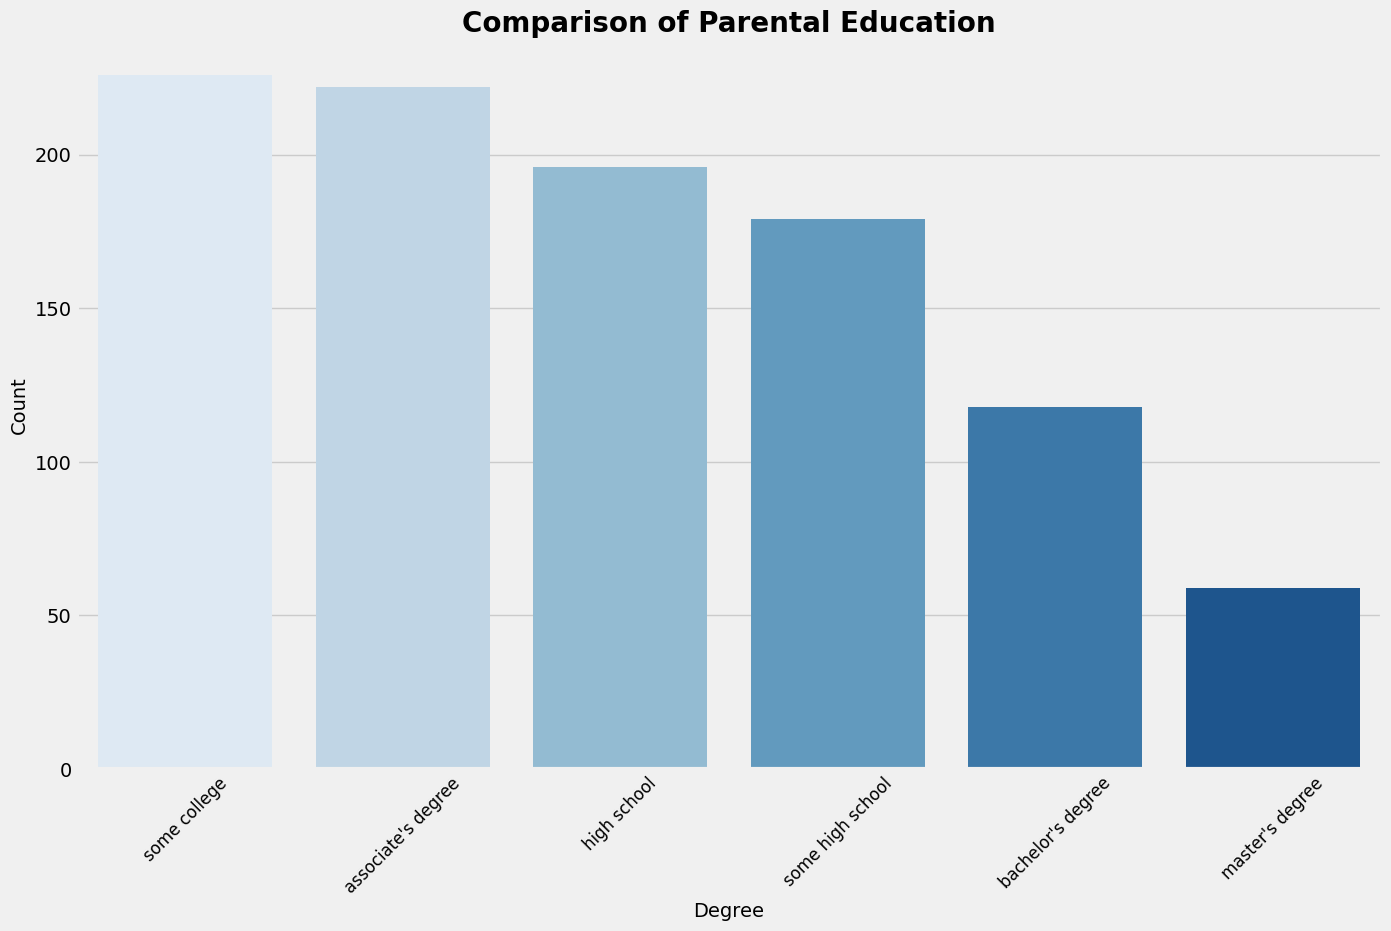

In [29]:
# Set figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create a countplot for 'parental level of education'
sns.countplot(
    data=df, 
    x='parental level of education', 
    palette='Blues', 
    order=df['parental level of education'].value_counts().index
)

# Add title and axis labels
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Display the plot
plt.show()

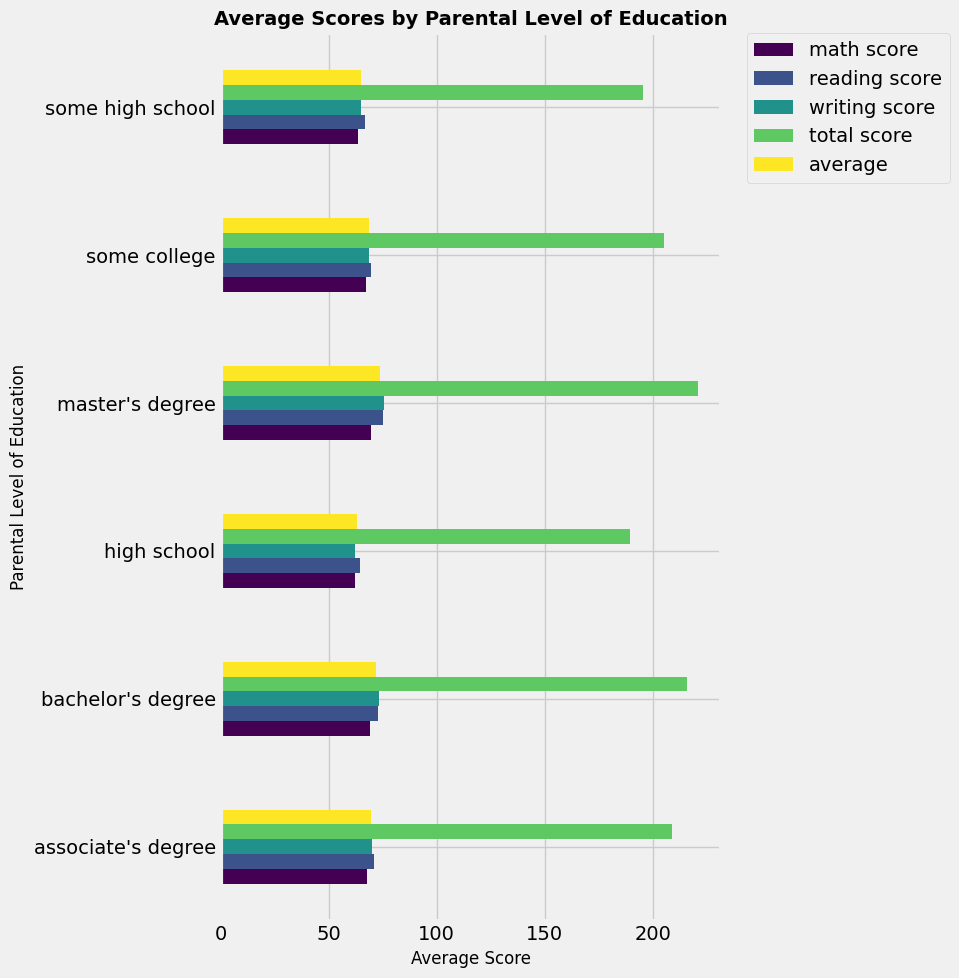

In [30]:
# Group data by 'parental level of education' and calculate the mean
df.groupby('parental level of education').mean(numeric_only=True).plot(
    kind='barh', 
    figsize=(10, 10), 
    colormap='viridis'  # Use a colormap for better visualization
)

# Add legend outside the plot for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Average Scores by Parental Level of Education', fontsize=14, fontweight='bold')
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Parental Level of Education', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Insight
- The score of student whose parents possess master and bachelor level education are higher than others.

Lunch

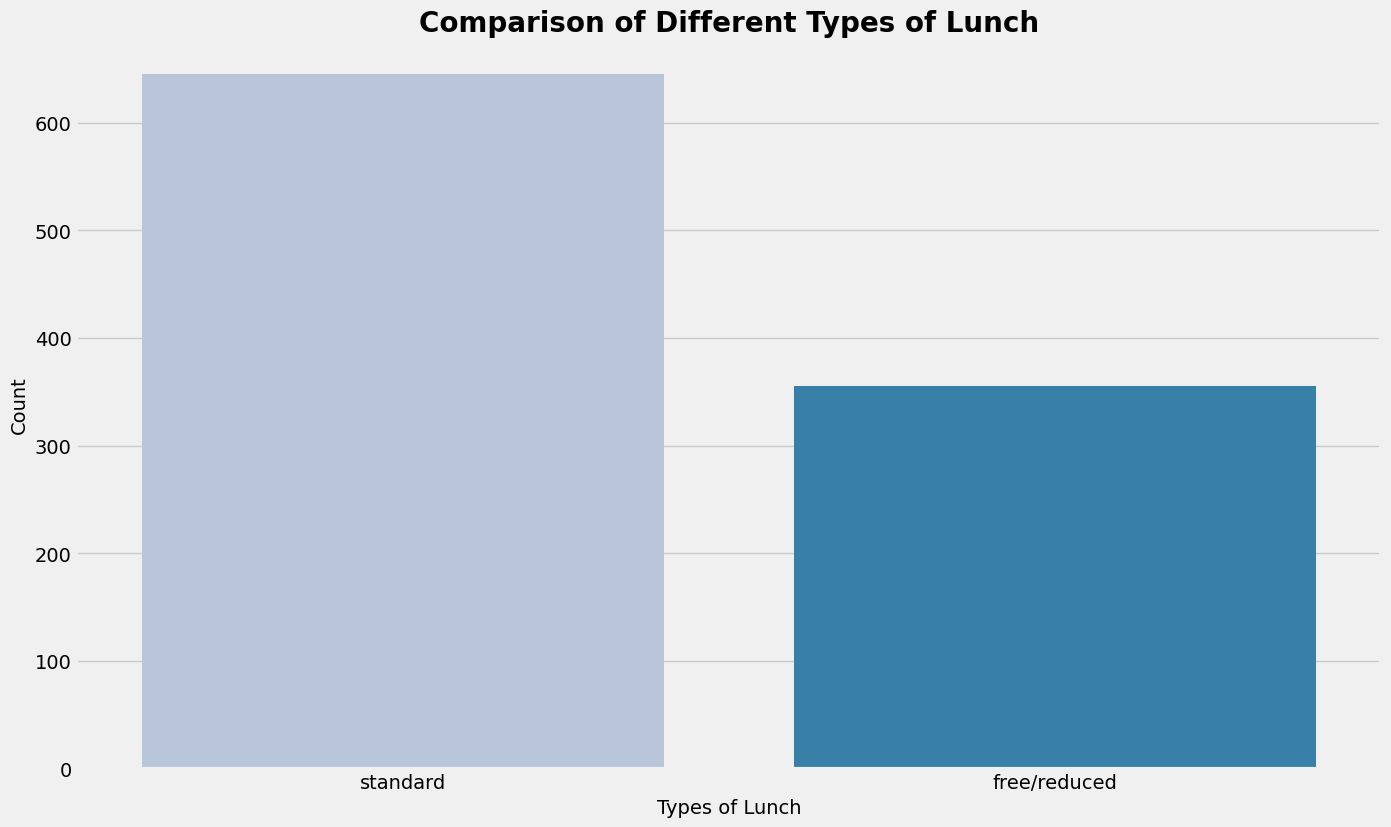

In [ ]:
# Set figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
# Create a countplot for 'lunch'
sns.countplot(data=df, x='lunch', palette='PuBu')

# Add title and axis labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

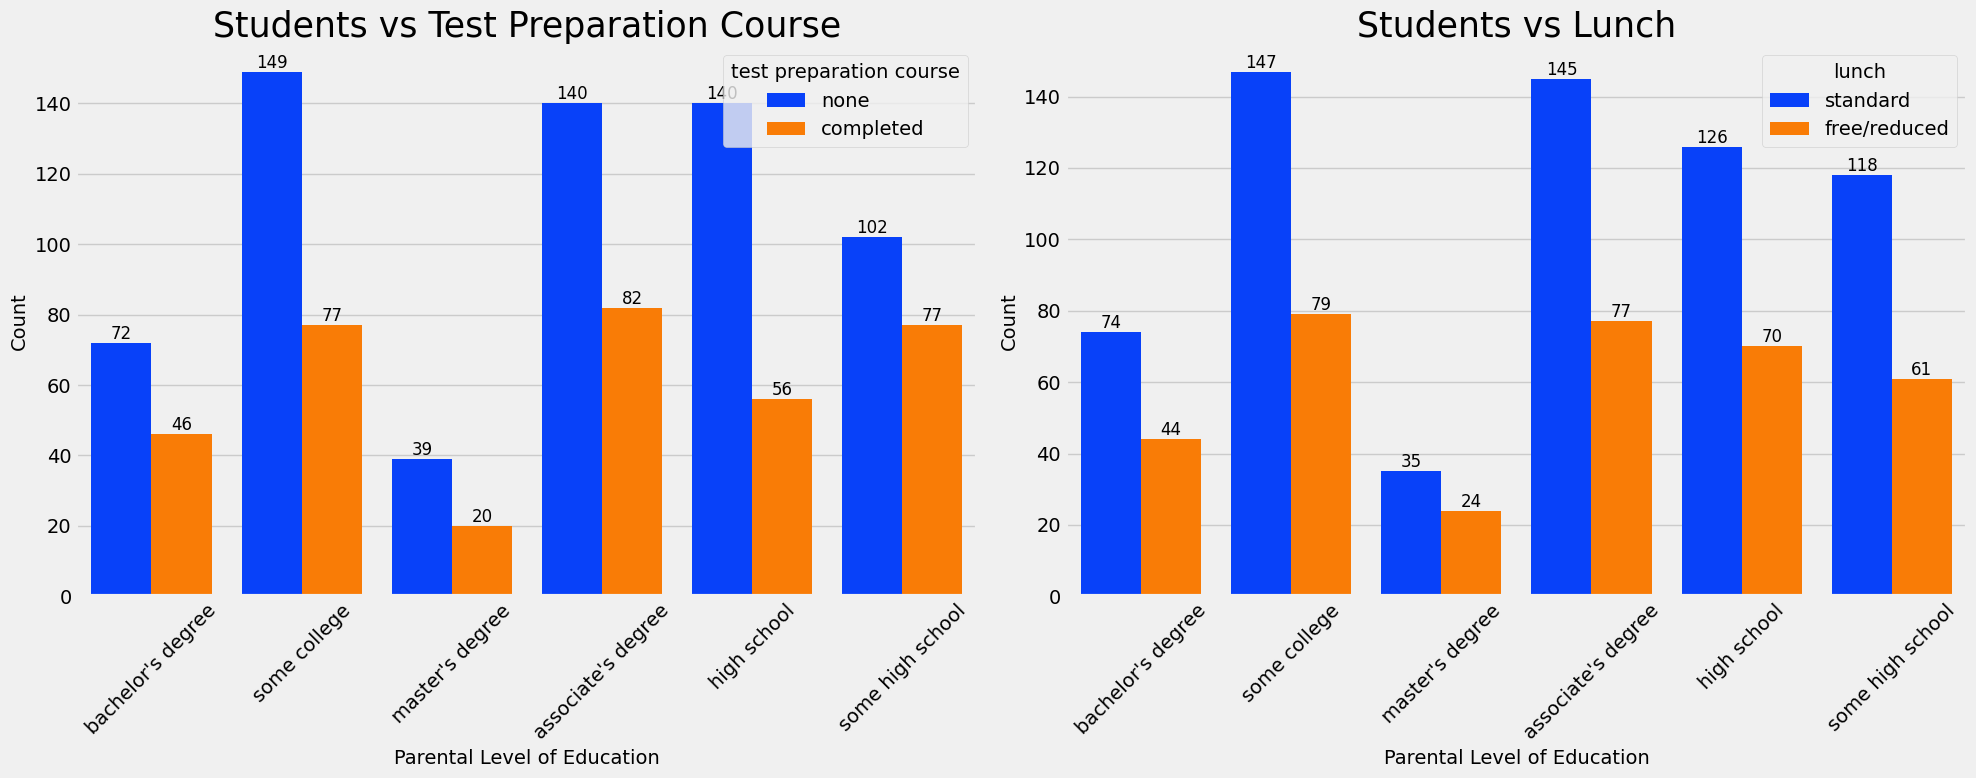

In [36]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Students vs Test Preparation Course
sns.countplot(
    x='parental level of education',
    data=df,
    palette='bright',
    hue='test preparation course',
    saturation=0.95,
    ax=ax[0]
)
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].set_xlabel('Parental Level of Education', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# Plot 2: Students vs Lunch
sns.countplot(
    x='parental level of education',
    data=df,
    palette='bright',
    hue='lunch',
    saturation=0.95,
    ax=ax[1]
)
ax[1].set_title('Students vs Lunch', color='black', size=25)
ax[1].set_xlabel('Parental Level of Education', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

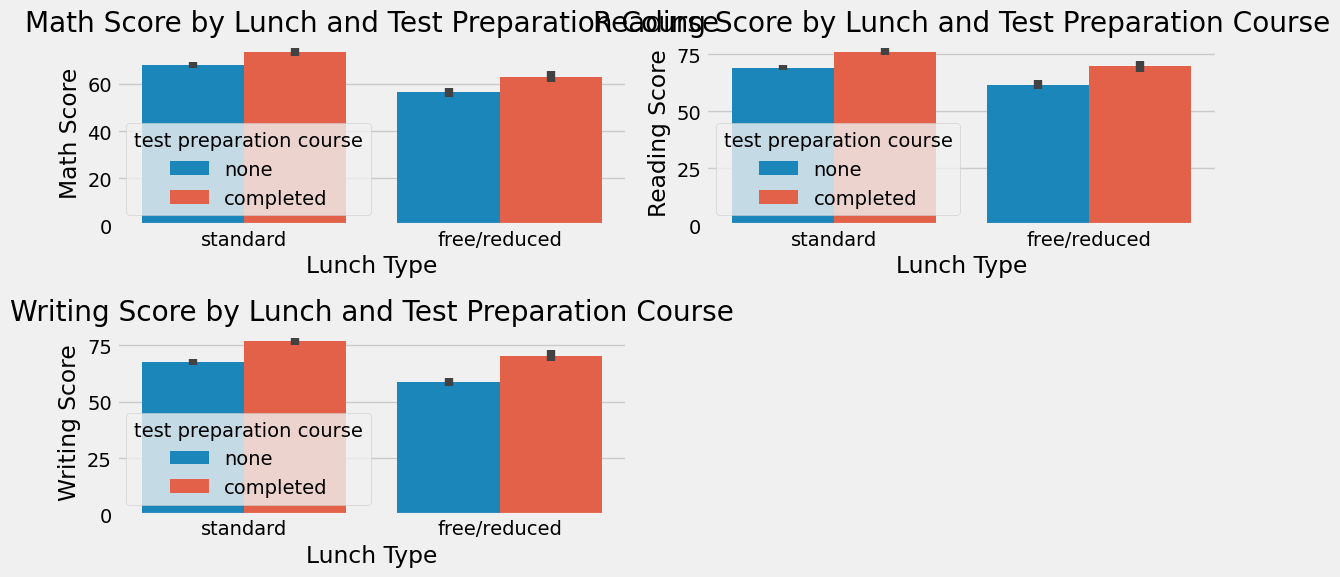

In [37]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot Math Score
plt.subplot(2, 2, 1)
sns.barplot(data=df, x='lunch', y='math score', hue='test preparation course')
plt.title('Math Score by Lunch and Test Preparation Course')
plt.xlabel('Lunch Type')
plt.ylabel('Math Score')

# Plot Reading Score
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='lunch', y='reading score', hue='test preparation course')
plt.title('Reading Score by Lunch and Test Preparation Course')
plt.xlabel('Lunch Type')
plt.ylabel('Reading Score')

# Plot Writing Score
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='lunch', y='writing score', hue='test preparation course')
plt.title('Writing Score by Lunch and Test Preparation Course')
plt.xlabel('Lunch Type')
plt.ylabel('Writing Score')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Check Outliers

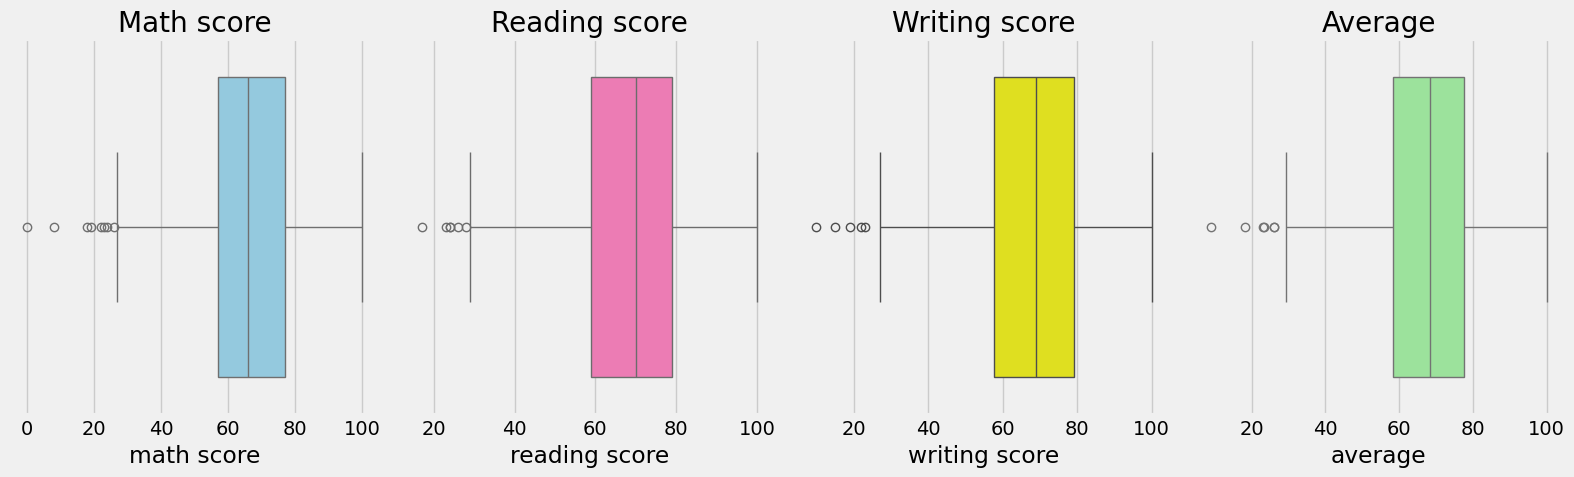

In [38]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Define the columns and colors for the boxplots
columns = ['math score', 'reading score', 'writing score', 'average']
colors = ['skyblue', 'hotpink', 'yellow', 'lightgreen']

# Loop through each column and create a boxplot
for i, (col, color) in enumerate(zip(columns, colors)):
    sns.boxplot(data=df, x=col, color=color, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

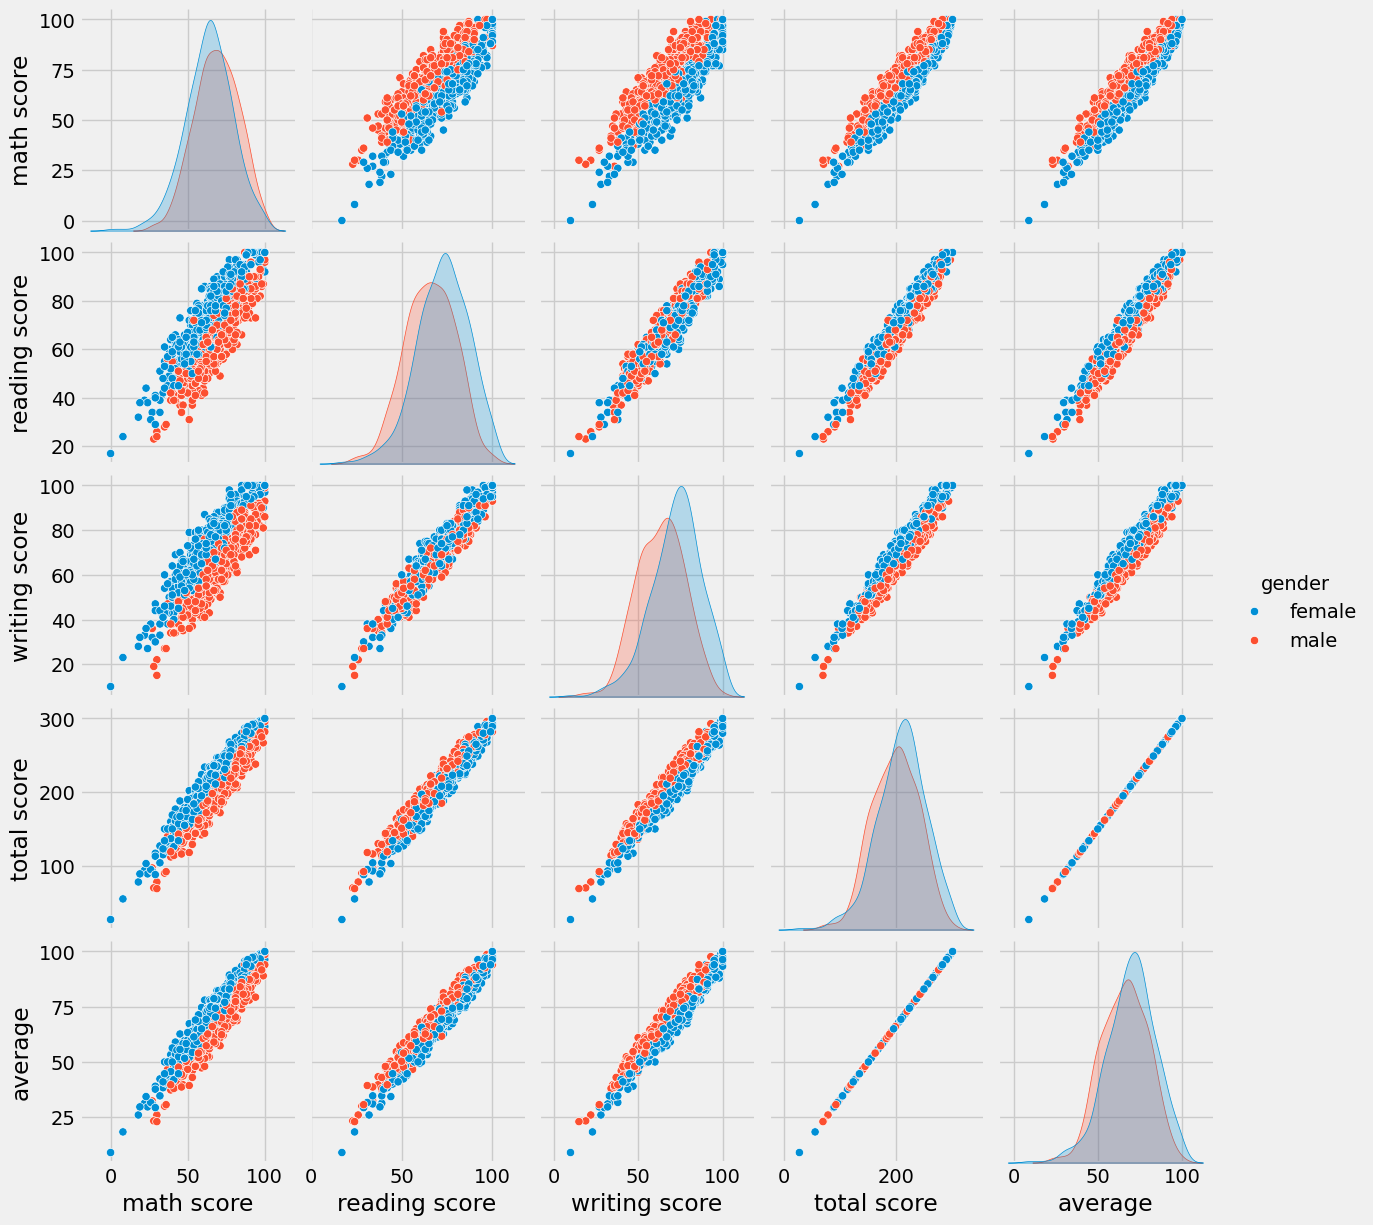

In [39]:
sns.pairplot(df,hue = 'gender')
plt.show()

all the scores increase linearly with each other.

Conclusion:

Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.